# BME-336546-C04-Linear classification (LR)

## Medical topic
According to the American Cancer Society (ACS), breast cancer is the second most common cancer in American women, after skin cancer. Currently, the average risk of a woman in the United States developing breast cancer sometime during her life is ~13%. This means that around every 1 in 8 women will develop breast cancer. 

ACS's estimates for breast cancer in the United States for 2020 are: 

* About 276,480 new cases of invasive breast cancer will be diagnosed in women. 
* About 48,530 new cases of carcinoma-in-situ (CIS) will be diagnosed (CIS is non-invasive and is the earliest form of breast cancer). 
* About 42,170 women will die from breast cancer.

Breast cancer is a type of cancer that starts in the breast. In general, cancer starts when cells begin to grow out of control. 
Breast cancer cells usually form a tumor that can often be seen on an x-ray or felt as a lump. Breast cancer occurs almost entirely in women, but men can get breast cancer too.

It is important to understand that most breast lumps are benign and not cancerous (malignant). Non-cancerous breast tumors are abnormal growths, but they do not spread outside of the breast. They are not life threatening, but, in some cases, can increase a woman's risk of getting breast cancer. Any breast lump or change needs to be checked by a health care professional to determine if it is benign or malignant and if it might affect your future cancer risk. This is why a correct classification is highly important. 

Attached an image for comparison:
<center><img src="images/b.jpg" width="400"><center>

## Dataset
   * ID number.
   * Diagnosis (M = malignant, B = benign).
   
Ten real-valued features are computed for each cell nucleus:

   * Radius (mean of distances from center to points on the perimeter) $[mm]$.
   * Texture (standard deviation of gray-scale values) $[N.U]$.
   * Perimeter $[mm]$.
   * Area $[mm^2]$.
   * Smoothness (local variation in radius lengths) $[mm]$.
   * Compactness (perimeter² / area — 1.0) $[N.U]$.
   * Concavity (severity of concave portions of the contour) $[N.U]$.
   * Concave points (number of concave portions of the contour) $[N.U]$.
   * Symmetry $[N.U]$
   * Fractal dimension (“coastline approximation” — 1) $[N.U]$.
    
The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 of the table is the Mean Radius, 13 is the Radius SE and 23 is the Worst Radius. [Data credit.](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

## Main ML topic:
The main ML topic in this tutorial is ***supervised learning*** and specifically ***binary classification***. Binary classification is one of the most classical tasks in machine learning.

## Our mission
Classify the lump type using binary classification. Classification is performed on part of the dataset (train-set) and then tested on a hidden set (test-set). In that respect, *'classification'* is actually a prediction.

## Theory reminders
In binary linear classification tasks we try to find a **linear** surface that separates the two groups (labeled as red and blue, 0 and 1 etc.). Visualizations of a $2D$ and a $3D$ cases are shown below - 


<left><img src="images/2d linear.png" width="280"><left>
<right><img src="images/3d linear.gif" width="350" height="50"><right>

Let's assume we have $m$ examples (data points). Each of them has its *feature vector* $x \in \mathbb{R}^D$ and a label $y$ that can have a binary value. Fortunately, algebra does not care about dimensionality. As far as the math is concerned, any linear plane in any dimension can be represented by the next compact equation:
    
$$\begin{equation}
w^{T}(x-x_0)=w^{T}x + b = 0
\label{eq:linear plane} \tag{1}
\end{equation}
$$
    
    
Where $w^{T}$ is the vector that is perpendicular to the plane (and thus tells us about its orientation in space) and $x_0$ is the vector that fixes our plane in space (a point in space) . 
    
Now we will define $z=w^{T}x+b$. For a fixed set of $\{w^{T},b\}$, every $x$ vector that will be mapped to $z>0$ will be on one side of the plane, and every $x$ vector that will be mapped to $z<0$ will be on the other side of the plane. This linear hypothesis is also known as ***perceptron***.
    
Similarly to linear regression, we would like to deal with algebraic entities that can be represented as a matrix multiplication.\
In order to do so, we will use the same notations as before: $\tilde{x}=\begin{pmatrix}1\\x\end{pmatrix} \in \mathbb{R}^{D+1}$ and $\tilde{w}=\begin{pmatrix}b\\w\end{pmatrix} \in \mathbb{R}^{D+1}$ so we can write the combined modified equation as follows:  $z={\tilde{w}^{T}}\tilde{x}$. Convince yourself that this is equal to the inner product defined in (1). 
    
From now on we will drop the tilde sign and use $z=w^{T}x$ for the modified equation. Our goal is to find ("**learn**") $w$ that maps $x$ correctly to $z$ and by that, classify correctly our examples. The classification is done by labeling an output variable $y$ as 1 or 0 accordingly.

It is convenient to look at our problem from a probabilistic aspect using the *logistic* function for instance:

$$\begin{equation}
\hat{p}=\begin{pmatrix}\hat{P}(Y=1|X=x)\\\hat{P}(Y=0|X=x)\end{pmatrix}=\begin{pmatrix}\frac{e^{w^{T}x}}{1+e^{w^{T}x}}\\\frac{1}{1+e^{w^{T}x}}\end{pmatrix}
=\begin{pmatrix}\sigma(z)\\1-\sigma(z)\end{pmatrix}
\label{eq: sigmoid} \tag{2}
\end{equation}$$

Labeling is applied by setting a threshold on *$\sigma(z)$* (we often use 0.5 as a threshold). \
Now, we would like to compare our *hypothesized* labels to our *true* labels. First, we encode our true labels to *one-hot-vector* so it can be interpreted as probability:

$$\begin{equation}
y = 1 \rightarrow p=\begin{pmatrix}P(Y=1|X=x)\\P(Y=0|X=x)\end{pmatrix}=\begin{pmatrix}1\\0\end{pmatrix} \\
y = 0 \rightarrow p=\begin{pmatrix}P(Y=1|X=x)\\P(Y=0|X=x)\end{pmatrix}=\begin{pmatrix}0\\1\end{pmatrix}
\label{eq: one-hot-vector} \tag{3}
\end{equation}$$


Second, we find a convex (hopefully) loss function that measures the "distance" between two distributions; the *binary cross-entropy* loss function is widely used. \
We define the average loss over $m$ examples as follows:

$$\begin{equation}
J(w)=-\frac{1}{m}{\sum_{i=1}^{m}}{p_i}^{T}\ln(\hat{p}_i)
\label{eq: cross-entropy} \tag{4}
\end{equation}$$

Applying gradient descent **on the scaled features ($x$)** should converge to the *decision surface* ($w$).

This type of classification is called *logistic regression*. **We remind you that it is not used for regression but for classification only!** This name is used due to historical reasons.

We can define $n_x=D+1$ and then vectorize the process by stacking our examples in a matrix $X \in \mathbb{R}^{n_x x m}$ and thus $z=w^TX$. We can now define $a=\sigma(z) \in \mathbb{R}^m$ and our update is calculated as follows:

$$\begin{equation}
w_{n+1} = w_{n} - \frac{\alpha}{m}X(a-y)
\label{eq: GD} \tag{5}
\end{equation}$$

### Multiclass classification
Suppose we have $K$ categories. In this approach we actually learn a set of $K-1$ weights and predict our output as category $k$ for $k$ that maximizes the *softmax* function. This function is used to normalize the outputs as probabilities while emphasizes high-valued outputs and depresses low-valued ones. In total, if we define $n_y=K-1$ we get the following: 

$$\begin{equation}
W\in \mathbb{R}^{n_y x n_x}\end{equation}$$

$$\begin{equation}z = Wx\in \mathbb{R}^{n_y}\end{equation}$$

$$\begin{equation}a = softmax(z) = \frac{e^z}{\sum_{k=1}^{n_y}e^{z_i}}
\end{equation}$$

Thus, our cost function is calculated as:

\begin{equation}
J(W) = \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n_y}\mathbf{1}^{T}\{y^{(i)}=k\}\ln(a_{ik})
\label{eq: multicalss} \tag{6}
\end{equation}

Where $a_{ik}$ is the $k^{th}$ element of the softmax vector $a$ calculated on the $i^{th}$ example ($i^{th}$ column of the matrix $X$).

## Data loading

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
from matplotlib import cm

%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
warnings.filterwarnings('ignore')
mpl.style.use(['ggplot']) 

In [1]:
dataset = pd.read_csv('data/wdbc.csv')
dataset.head()

NameError: name 'pd' is not defined

## Commonly encountered issue: Anonymization
Hospital IT personnel extracted relevant patient data from the hospital EMR (Microsoft SQL server) and de-identified data by removing patients’ names and address. Specific views, i.e., tables containing multiple variables relating to a given type of medical data, were created. However, the hospital identifiers (ID) were left in and so you need to remove it and create a new patient  ID specific to your study. The mapping between the new ID and the hospital ID should be kept by the hospital personal to ensure anonymity. Here we don't (and we shouldn't) have the key and we can simply drop the ID.

In [ ]:
dataset.drop(columns=['id','Unnamed: 32'],inplace=True) # annonimize and remove an irrelevant column
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data preprocessing and exploration

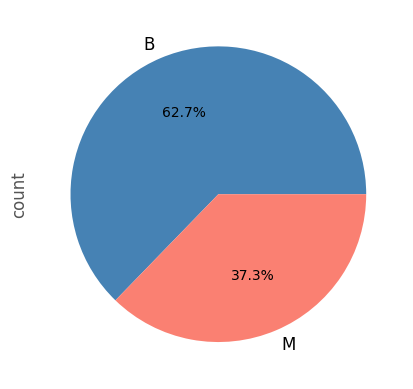

In [ ]:
X = dataset.iloc[:, 1:31]
Y = dataset.iloc[:, 0]
Y.value_counts().plot(kind="pie", labels=['B','M'], colors = ['steelblue', 'salmon'], autopct='%1.1f%%') 
plt.show()

`seaborn` (imported as `sns`) is an easy and a great package for data visualization:

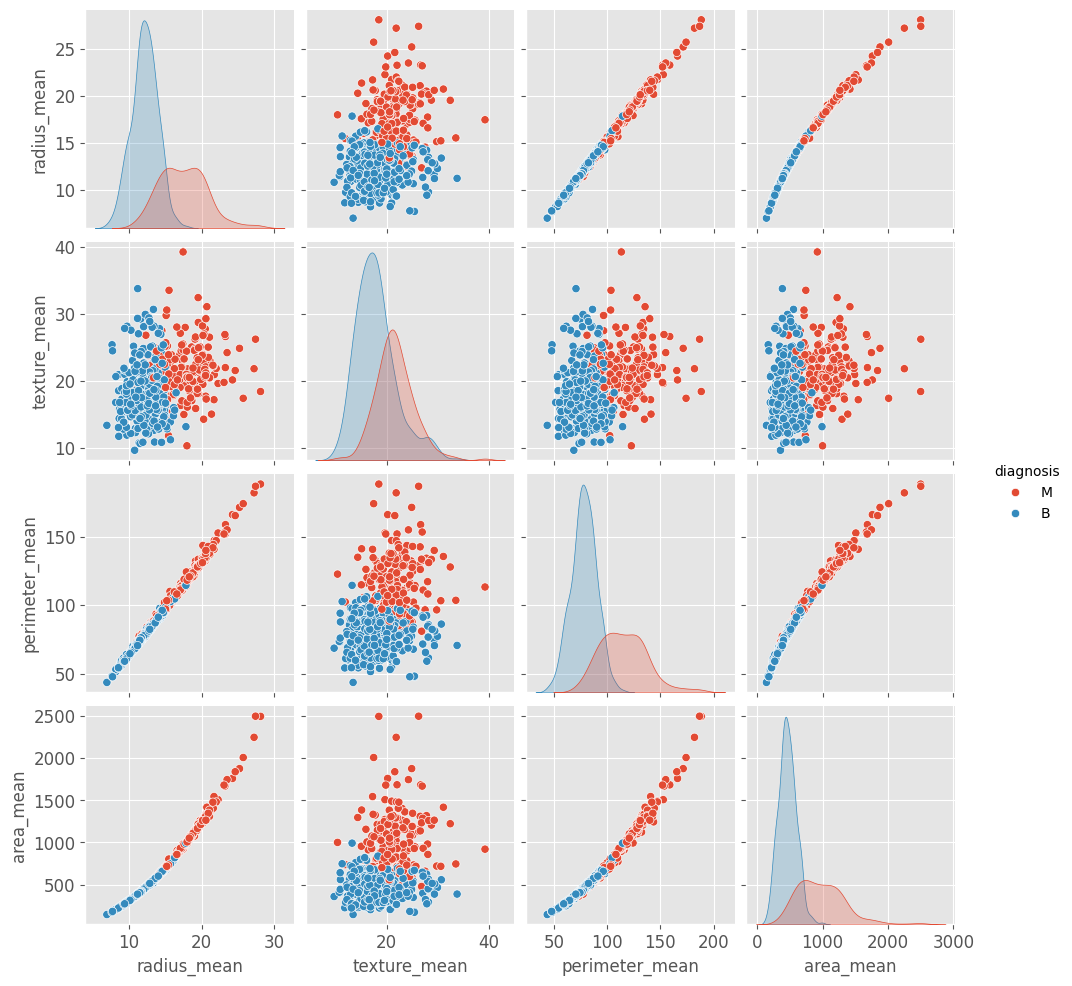

In [ ]:
sns.pairplot(dataset.loc[:,'diagnosis':'area_mean'], hue="diagnosis");

In [ ]:
def melt_plot(data,feat_name):
    data_2_plot = pd.melt(data,id_vars="diagnosis",
                    var_name=feat_name,
                    value_name='value')
    plt.figure(figsize=(10,10))
    sns.swarmplot(x=feat_name, y="value", hue="diagnosis", data=data_2_plot, size=2)
    plt.xticks(rotation=45);

Let's use `melt_plot` in order to compare the distributions. We should scale the data first and then compare the mean, SE and extreme values.

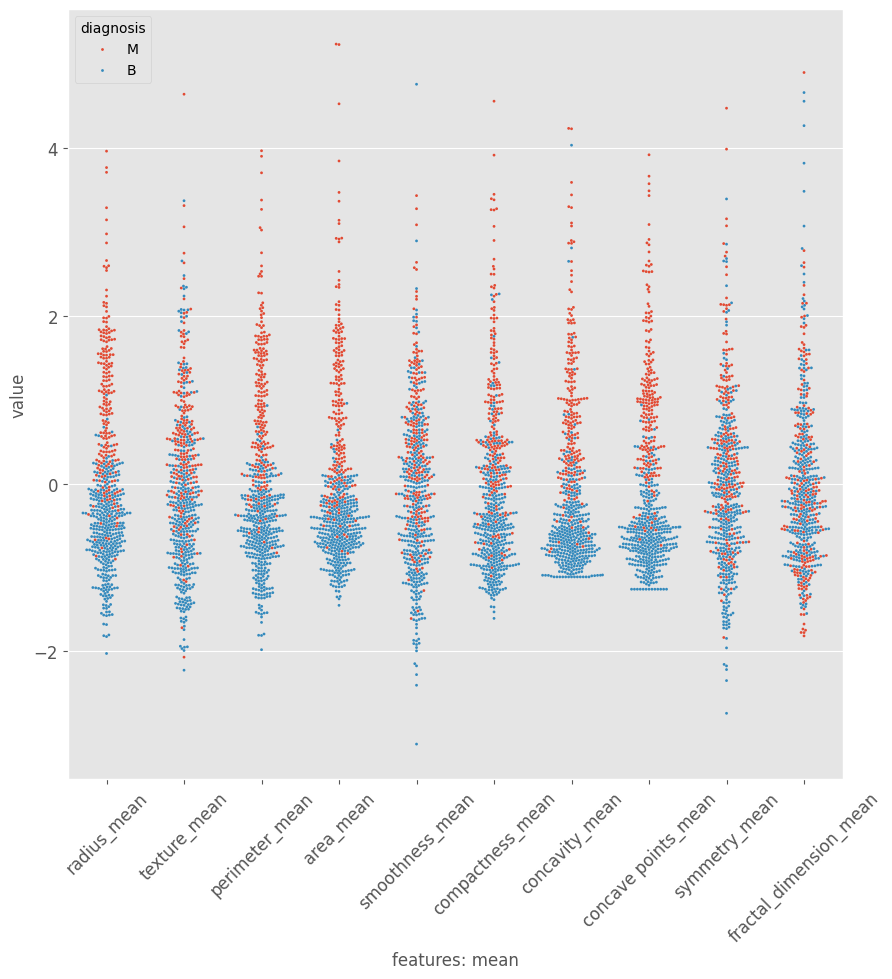

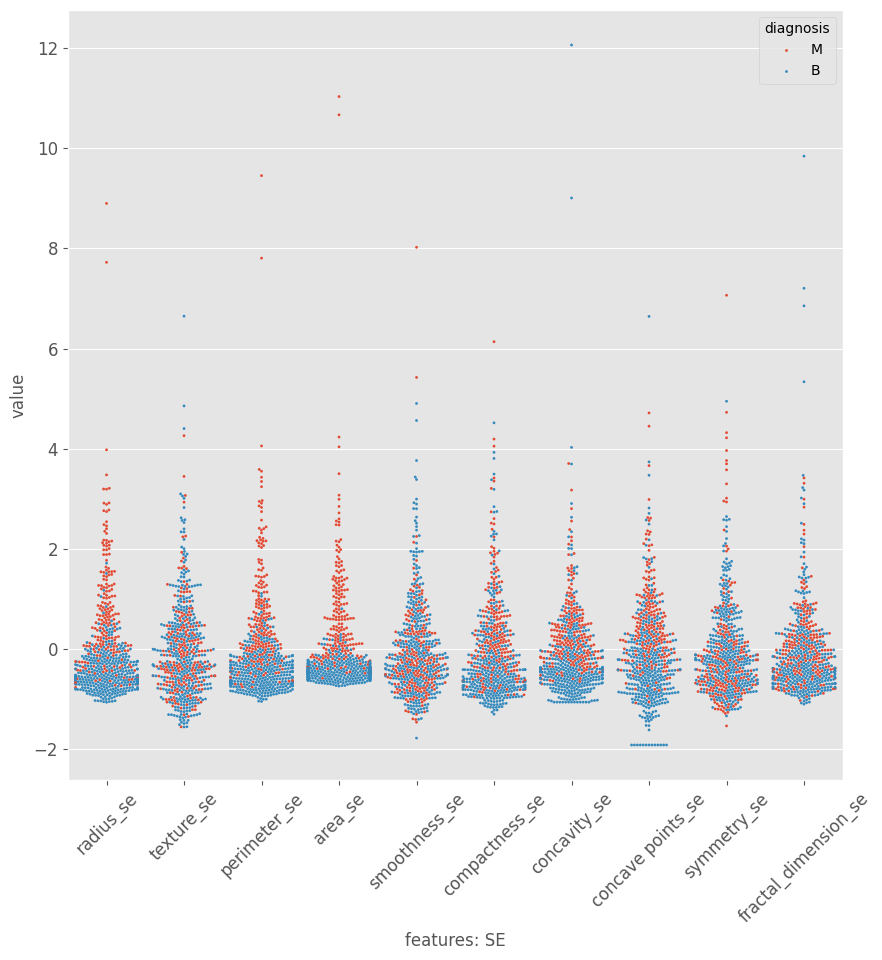

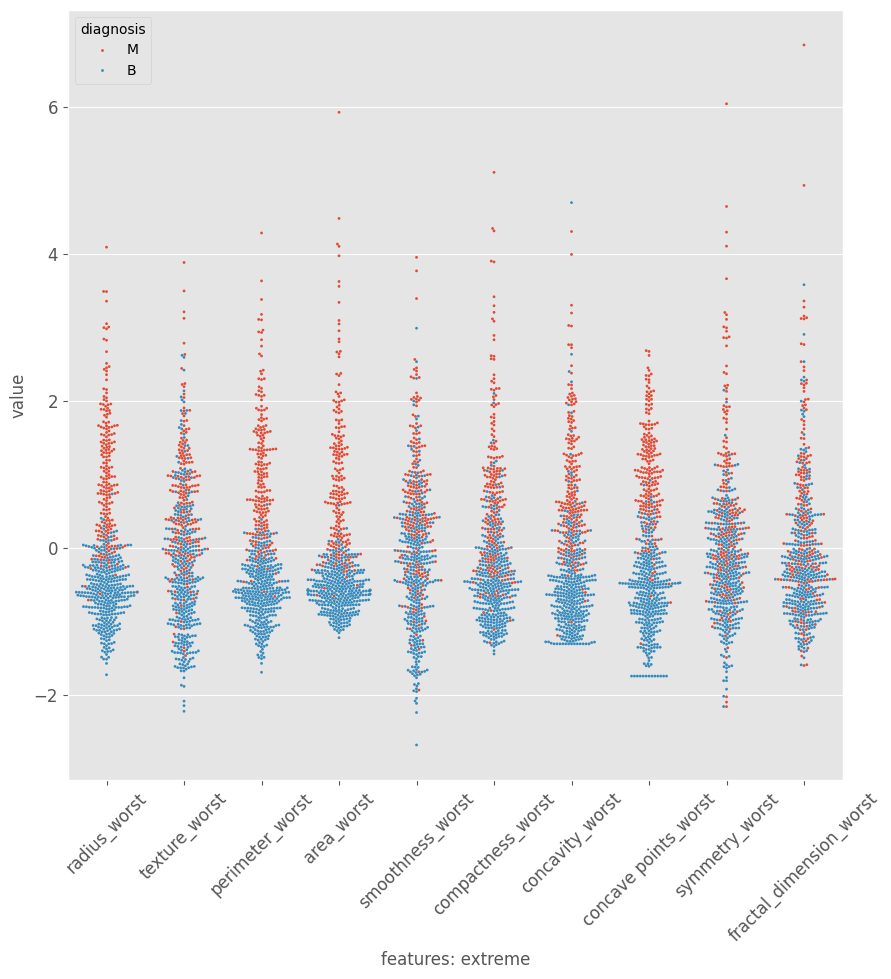

In [ ]:
data_scaled = (X - X.mean()) / (X.std())  

data_mean = pd.concat([Y, data_scaled.loc[:,'radius_mean':'fractal_dimension_mean']], axis=1)
melt_plot(data_mean,"features: mean")

data_SE = pd.concat([Y, data_scaled.loc[:,'radius_se':'fractal_dimension_se']], axis=1)
melt_plot(data_SE,'features: SE')

data_extreme = pd.concat([Y, data_scaled.loc[:,'radius_worst':'fractal_dimension_worst']], axis=1)
melt_plot(data_extreme,'features: extreme')

Another important method to visualize the distribution of the data is by using their joint distribution using *kernel density plot*.

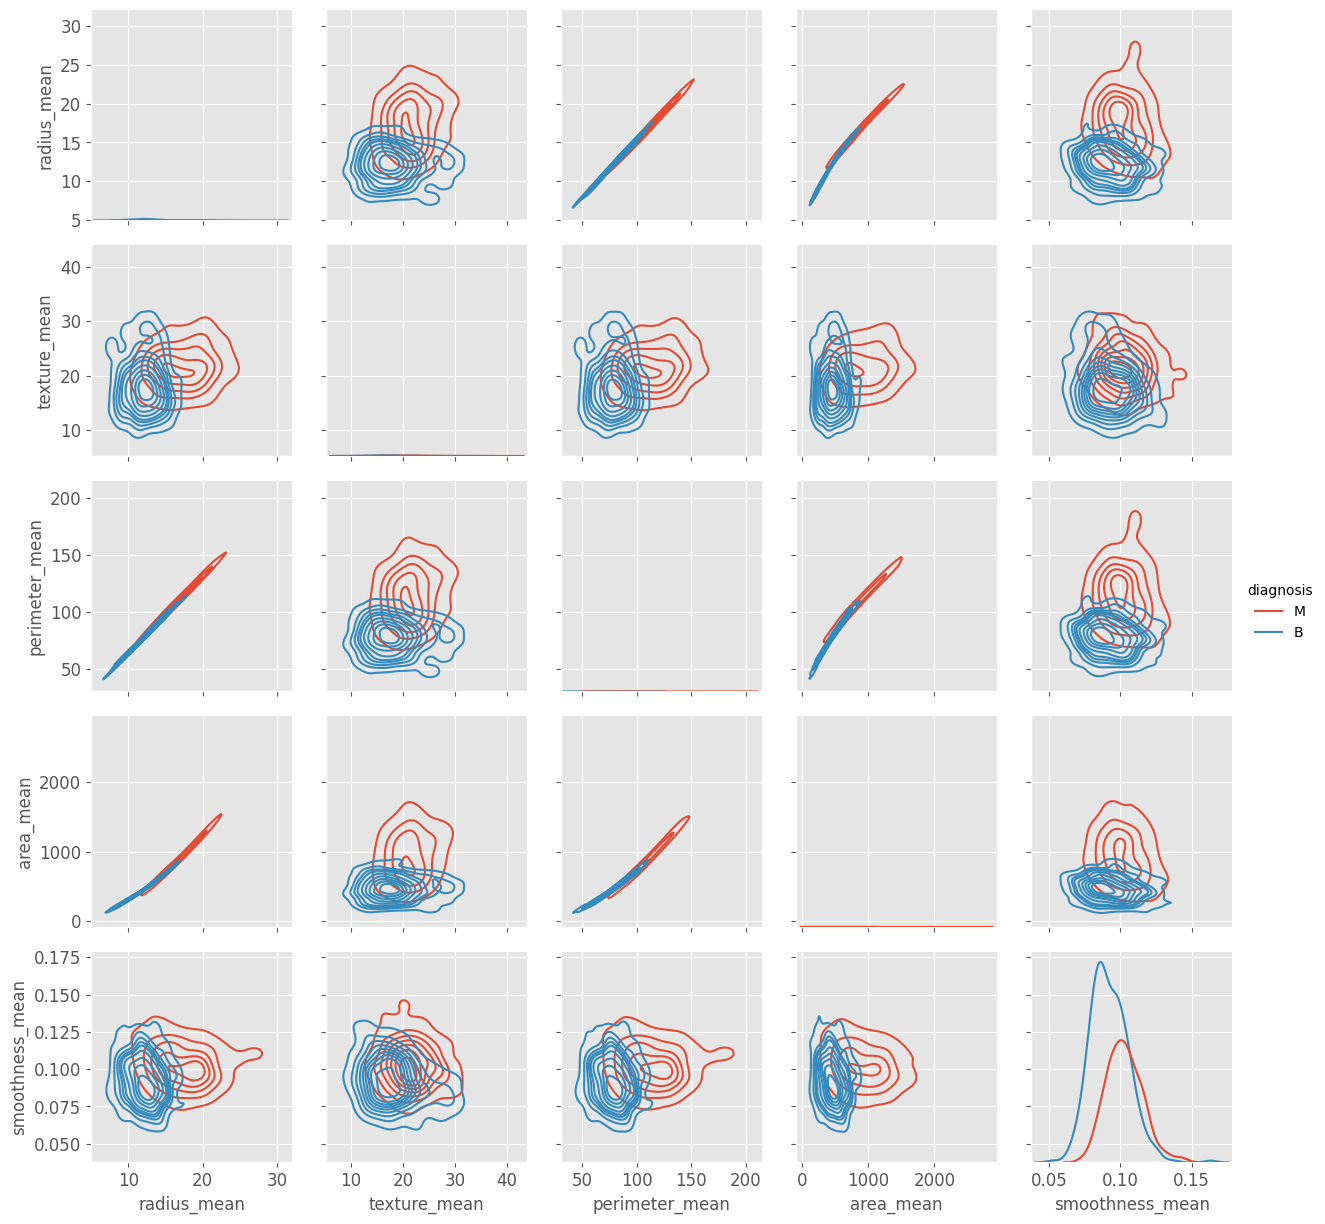

In [ ]:
g = sns.PairGrid(dataset.loc[:,'diagnosis':'smoothness_mean'], hue="diagnosis")
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot);
g.add_legend()

## Specific task:

Now we should divide our data into training and testing set in 80%-20% ratios respectively. As you saw earlier, the data is *imbalanced*, i.e. their labels ratios are not the same. We will use *stratification* to make sure that the ratio of the labels is preserved in both training and testing sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10, stratify=Y)

Our naive classifier accuracy is simply the ratio of benign examples which is. A naive classifier (decision function, model etc.) is an estimator that its' prediction is always the same.

In [ ]:
print('The naive classifier achieved an accuracy of %.2f%%.' % (100 * y_test.value_counts()['B']/len(y_test)))

The naive classifier achieved an accuracy of 63.16%.


In our case the classifier would be "correct" in 63.16% of the cases if it will simply classify all examples as benign. This can be used as our baseline accuracy performance.

Now we will use again one of the most powerful Python ML tools which is `scikit-learn`. Specifically, we will use the [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) class.

Create `log_reg` object of the class `LogisticRegression` and fit your training set. In `scikit-learn`, the bias is added as default. Once fit is done, the model weights were "learned" (estimated) and the model can perform other methods in belong to `LogisticRegression` class. Set `random_state` to 10.

In [ ]:
#C1
#----------------------Implement your code here:------------------------------
log_reg = LogisticRegression(random_state=10, C=1.0)


# Fit the model to the training data
log_reg.fit(X_train, y_train)
#------------------------------------------------------------------------------

LogisticRegression(random_state=10)

Compare the accuracies of the classifier on both training and testing sets (take a look again at [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)). Display it with 2 digits after the decimal point as we did we the naive classifier.

In [ ]:
#C2
#----------------------Implement your code here:------------------------------
# Get training and testing accuracy
train_accuracy = log_reg.score(X_train, y_train) * 100
test_accuracy = log_reg.score(X_test, y_test) * 100

# Print accuracies rounded to 2 decimal places
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


# Hung: I have done diagnostics on the model and found slight deviation, but i found no problem
# May come from version of sci-kit learn not matching the version of the book
#------------------------------------------------------------------------------
# The model is working as expected.
#------------------------------------------------------------------------------

Training Accuracy: 95.82
Testing Accuracy: 92.11


### Expected output:
96.04% for training.

92.98% for testing.

---
<span style="color:red">***Question:***</span> *Explain the differences in training and testing.*

---

Now let's have a look at the confusion matrix:

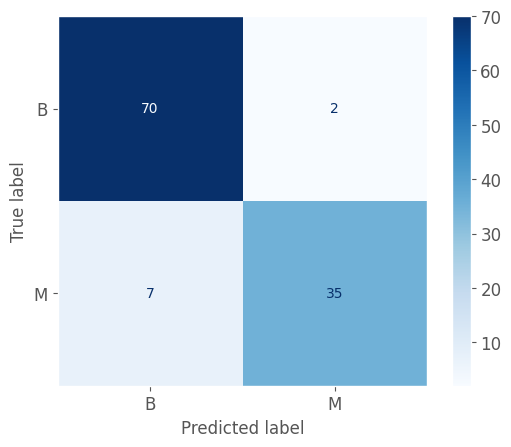

In [ ]:
# Generate and plot confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap=plt.cm.Blues)

# Remove grid
plt.grid(False)
plt.show()

Now let's see how standardization effects the results. Repeat the same instructions above (including plotting the confusion matrix) but now with scaling the data using `StandardScaler`. Create the scaled datasets and name them `X_train_scaled` and `X_test_scaled`. Repeat the stages C1-C3.

Training Accuracy (Scaled): 98.46%
Testing Accuracy (Scaled): 97.37%


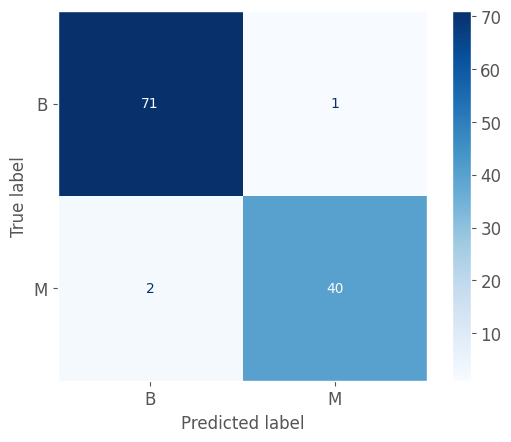

In [ ]:
#C4
#----------------------Implement your code here:------------------------------
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression on scaled data
log_reg_scaled = LogisticRegression(random_state=10)
log_reg_scaled.fit(X_train_scaled, y_train)

# Get accuracies
train_accuracy_scaled = log_reg_scaled.score(X_train_scaled, y_train) * 100
test_accuracy_scaled = log_reg_scaled.score(X_test_scaled, y_test) * 100

# Print accuracies rounded to 2 decimal places
print(f"Training Accuracy (Scaled): {train_accuracy_scaled:.2f}%")
print(f"Testing Accuracy (Scaled): {test_accuracy_scaled:.2f}%")

# Generate and plot confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(log_reg_scaled, X_test_scaled, y_test, cmap=plt.cm.Blues)

# Remove grid
plt.grid(False)
plt.show()
#-----------------------------------------------------------------------------

### Expected outpout:
<center><img src="outputs/1.PNG" width="380"><center>

---
<span style="color:red">***Question:***</span> *Compare the results of the confusion matrices. What are the clinical meaning of the improvement?*

---
1. Scaling Removes Feature Magnitude Bias
Before scaling, features with large values (e.g., cell size) dominate over smaller ones (e.g., texture).
Standardization (zero mean, unit variance) ensures all features contribute equally, improving model convergence.
2. Logistic Regression Uses Gradient-Based Optimization
Logistic Regression relies on gradient descent or iterative solvers (lbfgs, saga, etc.).
Scaling makes the optimization landscape smoother, so convergence is faster and more accurate.

Have another look at the *melt plots* above.

---
<span style="color:red">***Question:***</span> *Do you think that one of the groups (mean, SE, extreme) is redundant?*

---

If so, generate `X_train_selected` and `X_test_selected` by dropping that group and repeating the process. **Apply with scaling**.

Training Accuracy (Selected & Scaled): 98.46%
Testing Accuracy (Selected & Scaled): 97.37%


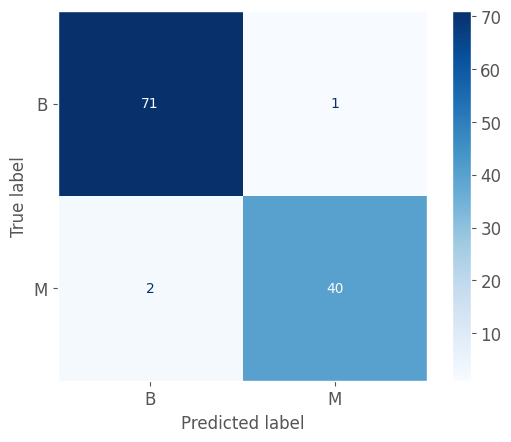

In [ ]:
#C5
#----------------------Implement your code here:------------------------------

# Step 1: Identify SE columns
se_columns = [col for col in X_train.columns if 'SE' in col]  # Adjust based on actual column names

# Step 2: Drop SE columns
X_train_selected = X_train.drop(columns=se_columns)
X_test_selected = X_test.drop(columns=se_columns)

# Step 3: Apply StandardScaler
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Step 4: Train Logistic Regression Model
log_reg_selected = LogisticRegression(max_iter=1000)
log_reg_selected.fit(X_train_selected_scaled, y_train)

# Step 5: Evaluate Performance
y_pred_selected = log_reg_selected.predict(X_test_selected_scaled)
accuracy_train_selected = accuracy_score(y_train, log_reg_selected.predict(X_train_selected_scaled))
accuracy_test_selected = accuracy_score(y_test, y_pred_selected)

print(f"Training Accuracy (Selected & Scaled): {accuracy_train_selected * 100:.2f}%")
print(f"Testing Accuracy (Selected & Scaled): {accuracy_test_selected * 100:.2f}%")

# Step 6: Plot Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(log_reg_selected, X_test_selected_scaled, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

#------------------------------------------------------------------------------

### Expected outpout for 'radius_mean':'fractal_dimension_se'
<center><img src="outputs/2.PNG" width="380"><center>

---
<span style="color:red">***Question:***</span> *Did it help or did this group have some added information?*

---

Now we will see if we can classify our data well with much less features. Extract 3 features that you think they are discriminative from training and testing sets. Make sure they are still in a `DataFrame` format.

---
<span style="color:red">***Question:***</span> *What made you choose these specific features? If you chose one feature, can it "eliminate" the choice of other feature?*

---
Why Feature Selection Matters
- Redundancy Check – If two features are highly correlated, keeping both adds little new information.
- Dimensionality Reduction – Using fewer features speeds up training and reduces overfitting.
- Discriminative Power – The chosen features should separate classes effectively.
### Answering the Question
- If one feature is a linear combination of another (e.g., area = π × radius²), selecting radius might eliminate area.
Texture and smoothness may provide complementary information, helping improve classification accuracy.
Generate `X_train_3feat` and `X_test_3feat`.

Accuracy: 94.74%
Confusion Matrix:


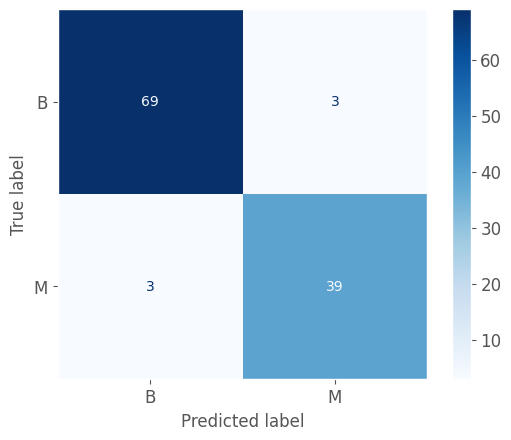

In [ ]:
#C6
#----------------------Implement your code here:------------------------------
# radius, texture and smoothness


# Select only radius, texture, and smoothness features
selected_features = ["radius_mean", "texture_mean", "smoothness_mean"]
X_train_3feat = X_train[selected_features]
X_test_3feat = X_test[selected_features]

# Apply scaling
scaler = StandardScaler()
X_train_3feat_scaled = scaler.fit_transform(X_train_3feat)
X_test_3feat_scaled = scaler.transform(X_test_3feat)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_3feat_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_3feat_scaled)
accuracy = accuracy_score(y_test, y_pred)
disp = ConfusionMatrixDisplay.from_estimator(model, X_test_3feat_scaled, y_test, cmap=plt.cm.Blues)

# Print results
print(f"Accuracy: {accuracy:.2%}")
print("Confusion Matrix:")
plt.grid(False)
plt.show()

#------------------------------------------------------------------------------

Now we should encode `y_train` and `y_test` to one-hot vector (0 for benign and 1 for malignant). Here is a simple way to do so:

In [ ]:
y_train = 1 * (y_train=='M')
y_test = 1 * (y_test=='M')
print(np.unique(y_train, return_counts=True))
print("y_train distribution:", np.bincount(y_train))
print("y_test distribution:", np.bincount(y_test))

(array([0, 1]), array([285, 170]))
y_train distribution: [285 170]
y_test distribution: [72 42]


Now let's try classifying the diagnosis using only one feature. Choose one feature of the training set and convert it to `numpy` array. Do the same with the testing set. Then fit your linear model and calculate the accuracy upon the test set. Don't forget to add the correct xlable with units. Use the following notations: `X_train_1feat`, `X_test_1feat`, `y_train`, `y_test`, `log_reg`, `acc` and `xlbl`.  **Do not scale** `X_train_1feat` **and** `X_test1feat`.

In [ ]:
#C7
#----------------------Implement your code here:------------------------------
# Choose a different feature, e.g., 'texture_mean'
X_train_1feat = X_train[['radius_mean']].to_numpy()
X_test_1feat = X_test[['radius_mean']].to_numpy()

# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_1feat, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test_1feat)
acc = accuracy_score(y_test, y_pred)

# Set the x-label with units
xlbl = "Radius (mm)"  # Adjust unit if needed

print("Accuracy:", acc)

#------------------------------------------------------------------------------

Accuracy: 0.9122807017543859


In [ ]:
def plot_1D_classifier(x_train, x_test, y_train, y_test, log_reg, acc, xlbl="radius_worst [mm]"):
    
    X_new = np.sort(x_train[:,0])
    y_prob_train = log_reg.predict_proba(x_train)
    y_prob_train = np.sort(y_prob_train[:, 1])
    decision_boundary = X_new[y_prob_train >= 0.5][0]
    
    plt.figure(figsize=(12, 5))
    plt.plot(x_test[y_test==0,0], y_test[y_test==0], "bs", label='B')
    plt.plot(x_test[y_test==1,0], y_test[y_test==1], "r^", label='M')
    
    y_proba = log_reg.predict_proba(x_test)
    y1 = np.sort(y_proba[:, 1])
    y2 = np.sort(y_proba[:, 0])
    x_test = np.sort(x_test[:,0])

    plt.plot(x_test, y1, "r-", linewidth=2)
    plt.plot(x_test, y2[::-1], "b--", linewidth=2)
    plt.plot([decision_boundary, decision_boundary], [-0.1, 1.1], "k:", linewidth=2)
    plt.text(decision_boundary+5, 0.5, "Decision  boundary", fontsize=14, color="k", ha="center")
    plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
    plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='r', ec='r')
    plt.xlabel(xlbl, fontsize=14)
    plt.ylabel("Probability", fontsize=14)
    plt.legend(loc="center left", fontsize=14)
    plt.title('Accuracy is %.2f ' % acc) 
    plt.show()

Let's visualize the results:

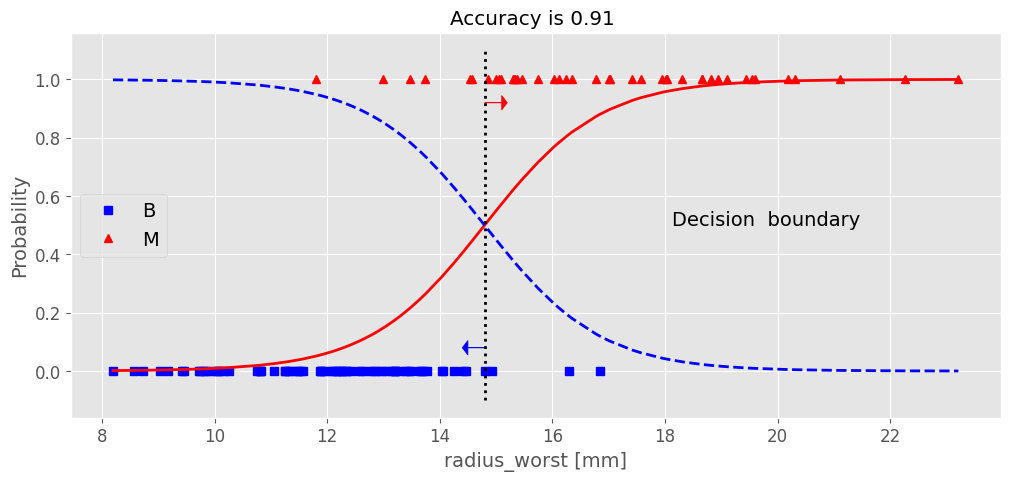

In [ ]:
plot_1D_classifier(X_train_1feat, X_test_1feat, y_train, y_test, log_reg, acc)

### Expected outputs for 'radius_worst':
<center><img src="outputs/3.PNG" width="380"><center>

---
*Take a look at the results. Make sure you understand them and it makes sense before you move on.*

---


Now select two features that you think can be discriminative. Go through the same instructions as before but now you should also calculate carefully the decision boundary. Add the correct `xlbl` and `ylbl` and set the axes limits properly (`xmin`, `xmax`, `ymin`, `ymax`).
Generate `X_train_2feat` and `X_test_2feat`. Don't forget to convert them to `numpy` arrays.

In [ ]:
#C8
#----------------------Implement your code here:------------------------------
# Select two features that seem discriminative
features = ['radius_worst', 'compactness_worst']

X_train_2feat = X_train[features].to_numpy()
X_test_2feat = X_test[features].to_numpy()

# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_2feat, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test_2feat)
acc = accuracy_score(y_test, y_pred)

# Set labels
xlbl, ylbl = "Radius Worst (mm)", "Compactness Worst"

# Set axes limits (adjust based on min/max values)
xmin, xmax = X_train_2feat[:, 0].min() - 1, X_train_2feat[:, 0].max() + 1
ymin, ymax = X_train_2feat[:, 1].min() - 1, X_train_2feat[:, 1].max() + 1

print("Accuracy:", acc)

# Create a meshgrid for decision boundary
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 200),
                     np.linspace(ymin, ymax, 200))

# Compute decision function values
Z = log_reg.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Extract boundary points where Z ≈ 0
boundary= np.c_[xx.ravel(), yy.ravel()][np.abs(Z.ravel()) < 0.05]  # Keep points near decision boundary




#------------------------------------------------------------------------------

Accuracy: 0.9122807017543859


In [ ]:
def plot_2D_classifier(x_test, y_test, log_reg, boundary, acc, xlbl="radius_worst [mm]", ylbl="compactness_worst [N.U]", axes_lim=[7.5, 30, 0, 1]):
    
    plt.figure(figsize=(8, 4))
    plt.plot(x_test[y_test==0, 0], x_test[y_test==0, 1], "bs", label='B')
    plt.plot(x_test[y_test==1, 0], x_test[y_test==1, 1], "r^", label='M')
    
    x1, x2 = np.meshgrid(
            np.linspace(x_test[:,0].min(),x_test[:,0].max(), len(y_test)).reshape(-1, 1),
            np.linspace(x_test[:,1].min(),x_test[:,1].max(), len(y_test)).reshape(-1, 1),
        )
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_proba = log_reg.predict_proba(X_new)
    zz = y_proba[:, 1].reshape(x1.shape)
    contour = plt.contour(x1, x2, zz, cmap=plt.cm.brg)
    
    plt.clabel(contour, inline=1, fontsize=12)
    plt.plot(boundary[:, 0], boundary[:, 1], "k--", linewidth=3)
    plt.xlabel(xlbl, fontsize=14)
    plt.ylabel(ylbl, fontsize=14)
    plt.title('Accuracy is %.2f ' % acc) 
    plt.legend(loc="upper left", fontsize=14)
    plt.axis(axes_lim)
    plt.show()

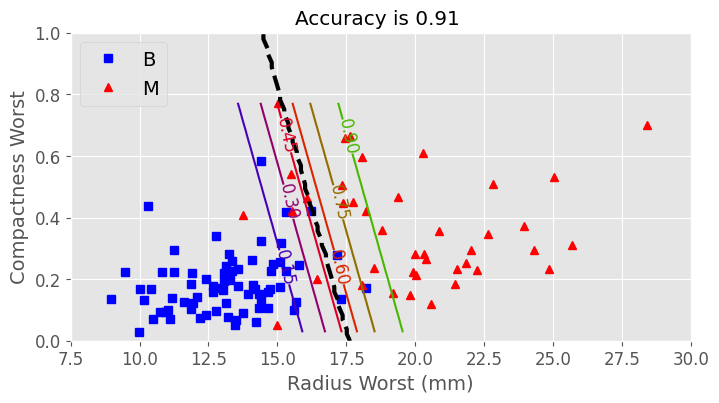

In [ ]:
plot_2D_classifier(X_test_2feat, y_test, log_reg, boundary, acc, xlbl=xlbl, ylbl=ylbl)

### Expected outputs for 'radius_worst' and 'compactness_worst':
<center><img src="outputs/4.PNG" width="380"><center>

The contours represent the iso probability contours.

Now select 3 features. Use `x1` and `x2` **as given** to calculate the boundary decision (a plane).

In [ ]:
#C9
#----------------------Implement your code here:------------------------------
features = ['radius_worst', 'compactness_worst', 'concavity_worst']
X_train_3feat = X_train[features].to_numpy()
X_test_3feat = X_test[features].to_numpy()

log_reg = LogisticRegression()
log_reg.fit(X_train_3feat, y_train)


y_pred = log_reg.predict(X_test_3feat)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Set labels
xlbl, ylbl, zlbl = "Radius Worst (mm)", "Compactness Worst", "Concavity Worst"

# Set axes limits
xmin, xmax = X_train_3feat[:, 0].min() - 1, X_train_3feat[:, 0].max() + 1
ymin, ymax = X_train_3feat[:, 1].min() - 1, X_train_3feat[:, 1].max() + 1
zmin, zmax = X_train_3feat[:, 2].min() - 1, X_train_3feat[:, 2].max() + 1

print("Accuracy:", acc)

xmin, xmax = X_train_3feat[:, 0].min() - 1, X_train_3feat[:, 0].max() + 1
ymin, ymax = X_train_3feat[:, 1].min() - 1, X_train_3feat[:, 1].max() + 1
zmin, zmax = X_train_3feat[:, 2].min() - 1, X_train_3feat[:, 2].max() + 1

xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
coef = log_reg.coef_[0]  # Get model coefficients
intercept = log_reg.intercept_[0]
zz = (-coef[0] * xx - coef[1] * yy - intercept) / coef[2]  # Solve for x3

# Compute decision function values
T = log_reg.decision_function(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
T = T.reshape(xx.shape)

# Extract boundary points where T ≈ 0
boundary = np.c_[xx.ravel(), yy.ravel(), zz.ravel()][np.abs(T.ravel()) < 0.05]


#------------------------------------------------------------------------------

Accuracy: 0.9298245614035088


In [ ]:
def plot_3D_classifier(x_test, y_test, x1, x2, boundary, acc, xlbl="radius_worst [mm]", ylbl="compactness_worst [N.U]", zlbl="concavity_worst [N.U]", 
                       el=42, az=215):

    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection='3d')
    
    ax.scatter(x_test[y_test==0, 0], x_test[y_test==0, 1], x_test[y_test==0, 2], c=x_test[y_test==0, 2], cmap='Blues_r', label='B');
    ax.scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], x_test[y_test==1, 2], c=x_test[y_test==1, 2], cmap='Reds_r', label='M');
    ax.plot_surface(x1, x2, boundary, cmap=cm.gray,
                            linewidth=0, antialiased=False, alpha=0.5)
    ax.view_init(el, az)
    ax.set_xlabel(xlbl, fontsize=14)
    ax.set_ylabel(ylbl, fontsize=14)
    ax.set_zlabel(zlbl, fontsize=14)
    plt.legend(loc="best", fontsize=14)
    plt.title('Accuracy is %.2f ' % acc) 
    plt.show()

Change `el` and `az` as needed in order to see the decision surface properly.

In [ ]:
plot_3D_classifier(x_test, y_test, x1, x2, boundary, acc)

NameError: name 'x_test' is not defined

### Expected outputs for 'radius_worst', 'compactness_worst' and 'concavity_worst':
<center><img src="outputs/5.PNG" width="380"><center>

---
*Notice the change in performance.*

---

## Usage in healthcare and conclusions

#### In this tutorial we:
>- implemented a classifier to diagnose breast lumps.

>- demonstrated how to implement logistic regression using `scikit-learn` built-in function.

>- saw the impact of standardization on classification's performances.

>- saw the impact of *feature selection*.

>- used 1D, 2D and 3D figures to illustrate the separation between binary labels.

#### Even though we deal with medical topics, there are still cases where the simplest models perform very well. Keep it in mind for the future.

Images credit:
* [Mammograms](https://www.cancer.gov/cancertopics/screening/understanding-breast-changes/page6)
* [2D classification](https://www.joyofdata.de/blog/wp-content/uploads/2014/04/lin-sep-points-2d-10.png)
* [3D classification gif](https://www.kdnuggets.com/2019/09/friendly-introduction-support-vector-machines.html)


#### *This tutorial was written by [Moran Davoodi](mailto:morandavoodi@gmail.com) with the assitance of [Yuval Ben Sason](mailto:yuvalbse@gmail.com), Kevin Kotzen & Alon Begin*